In [8]:
from sklearn.datasets import make_blobs

In [18]:
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)

In [19]:
import matplotlib.pyplot as plt

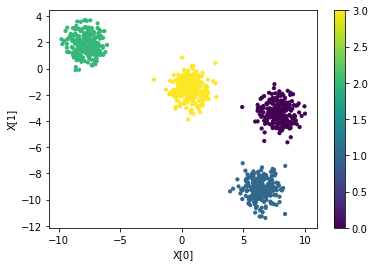

In [20]:
plt.scatter(X[:,0],X[:,1],s=10,c=y)
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()
#0 - purple
#1 - blue
#2 - Green
#3 - Yellow

In [7]:
X[:5]

array([[ 9.25784958, -2.82526517],
       [ 0.96889603, -1.63014501],
       [-8.2630645 ,  0.90588073],
       [-7.85737757,  2.17665695],
       [-8.28000833,  1.98407695]])

In [8]:
y[:5]

array([0, 3, 2, 2, 2])

In [9]:
import pandas as pd
df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1]})

In [10]:
df['Target'] = y

In [11]:
df.sample(10)

,X1,X2,Target
265,-6.700950,2.968534,2
654,-8.427515,2.086879,2
211,-8.747299,2.027333,2
230,-7.510516,1.770529,2
452,5.841403,-8.851165,1
455,-8.839894,3.093077,2
620,-8.497524,1.054302,2
918,7.855977,-4.099418,0
625,-6.394130,2.350309,2
646,0.936168,-1.993676,3


In [12]:
df.sample(5)

,X1,X2,Target
930,6.155487,-4.027930,0
515,-0.084803,-1.208757,3
441,0.561498,-1.337226,3
139,0.791710,-0.699895,3
196,1.580249,-2.259699,3


In [13]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [14]:
dt = DecisionTreeClassifier(criterion='entropy')

In [37]:
dt.fit(df[['X1','X2']],df.Target)

DecisionTreeClassifier(criterion='entropy')

In [38]:
import pandas as pd

In [39]:
import numpy as np
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

In [40]:
outcome = dt.predict(np.c_[xx.ravel(), yy.ravel()])

In [41]:
outcome

array([2, 2, 2, ..., 0, 0, 0])

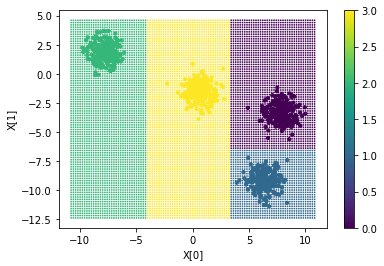

In [46]:
plt.scatter(X[:,0],X[:,1],s=10,c=y)
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()
#0 - purple
#1 - blue
#2 - Green
#3 - Yellow
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=.5)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knc = KNeighborsClassifier()

In [28]:
knc.fit(X,Y)

KNeighborsClassifier()

In [29]:
outcome = knc.predict(np.c_[xx.ravel(), yy.ravel()])

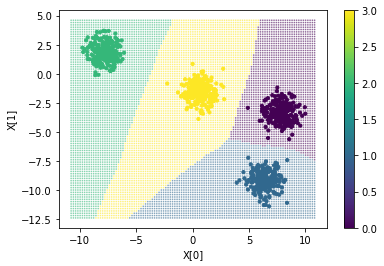

In [30]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y)
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()
#0 - purple
#1 - blue
#2 - Green
#3 - Yellow
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,alpha=.5,s=.5)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(X,Y)

LogisticRegression()

In [34]:
outcome = lr.predict(np.c_[xx.ravel(), yy.ravel()])

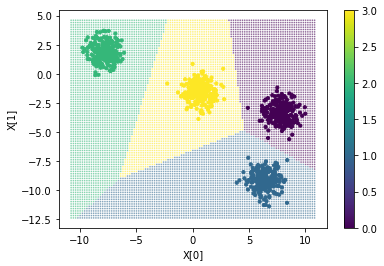

In [35]:
plt.scatter(X[:,0],X[:,1],s=10,c=Y)
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.colorbar()
#0 - purple
#1 - blue
#2 - Green
#3 - Yellow
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,alpha=.5,s=.5)

### Another Example

In [17]:
tennis_data = pd.read_csv('tennis.csv')

In [18]:
tennis_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
oe = OrdinalEncoder()

In [21]:
X = tennis_data.drop(columns=['play'])
y = tennis_data.play
X = oe.fit_transform(X)

In [22]:
dt = DecisionTreeClassifier(criterion='entropy')

In [23]:
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [24]:
oe.categories_

[array(['overcast', 'rainy', 'sunny'], dtype=object),
 array(['cool', 'hot', 'mild'], dtype=object),
 array(['high', 'normal'], dtype=object),
 array([False,  True])]

In [26]:
X

array([[2., 1., 0., 0.],
       [2., 1., 0., 1.],
       [0., 1., 0., 0.],
       [1., 2., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 1.],
       [0., 0., 1., 1.],
       [2., 2., 0., 0.],
       [2., 0., 1., 0.],
       [1., 2., 1., 0.],
       [2., 2., 1., 1.],
       [0., 2., 0., 1.],
       [0., 1., 1., 0.],
       [1., 2., 0., 1.]])

In [27]:
tennis_data.play

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

### predict the outcome - 
* ['outlook','temp','humidity','windy']
* [1., 0., 1., 1.]

In [28]:
dt.predict([[1,0,1,0]])

array(['yes'], dtype=object)

In [29]:
dt.predict([[1,0,1,1]])

array(['no'], dtype=object)

### Note : 
* Decision Trees are highly interpretable, what this means is - you can explain anybody why your model took the decision
* This is known as model interpretation 

### Reading Assignments
* Read about basic probability
* Read about entropy 
* Read about information gain